In [34]:
import pandas as pd
import matplotlib.pyplot as plt


In [48]:
df = pd.read_csv("0_Datasets_Aurora/preprocessed_12_cols_eth_timeseries_hourly.csv")
type(df)

pandas.core.frame.DataFrame

In [49]:
df.columns

Index(['asset_id', 'timestamp', 'time', 'open', 'close', 'high', 'low',
       'volume', 'volume_24h', 'market_cap', 'circulating_supply',
       'volatility'],
      dtype='object')

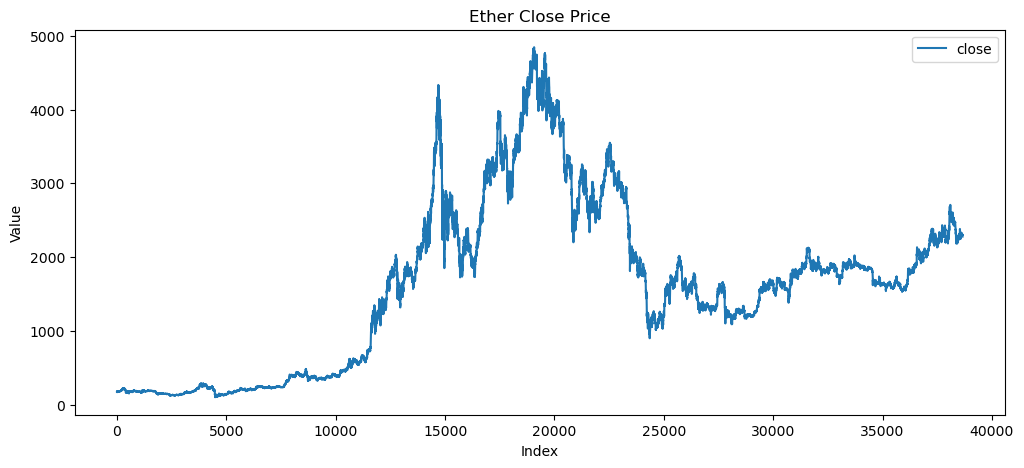

In [42]:
# Plot the 'Value' column
plt.figure(figsize=(12, 5))  # Set the figure size
plt.plot(df['close'], label='close')  # Line plot
plt.title("Ether Close Price")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()


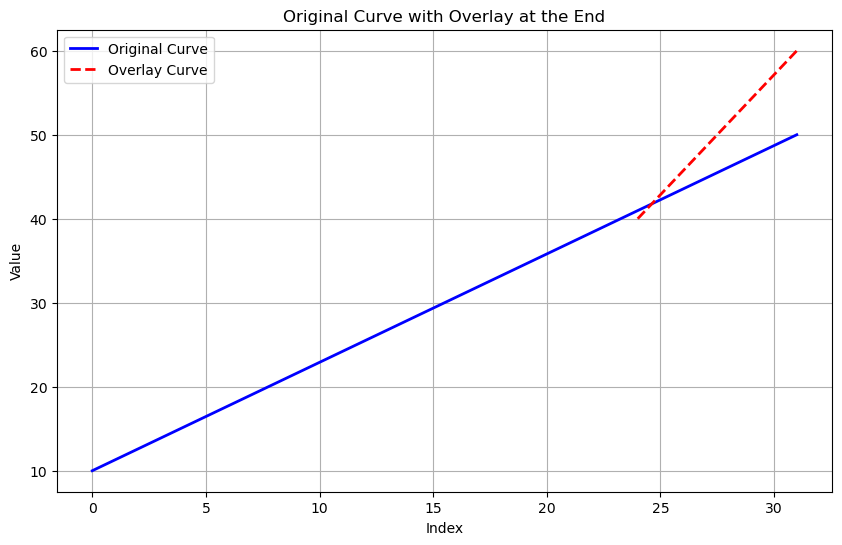

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame with 32 values
data = {
    'Value': np.linspace(10, 50, 32)  # Linearly spaced 32 values
}
df = pd.DataFrame(data)

# Sample overlay curve: Add 8 new values at the end
overlay_values = np.linspace(40, 60, 8)  # 8 values for the overlay curve
blank_overlay = [np.nan] * (32 - 8) + list(overlay_values)  # Blank (NaN) at the start

# Plot the original 'Value' column
plt.figure(figsize=(10, 6))
plt.plot(df['Value'], label='Original Curve', color='blue', linewidth=2)

# Overlay curve in red, starting at the end
plt.plot(blank_overlay, label='Overlay Curve', color='red', linestyle='--', linewidth=2)

# Add labels and legend
plt.title("Original Curve with Overlay at the End")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


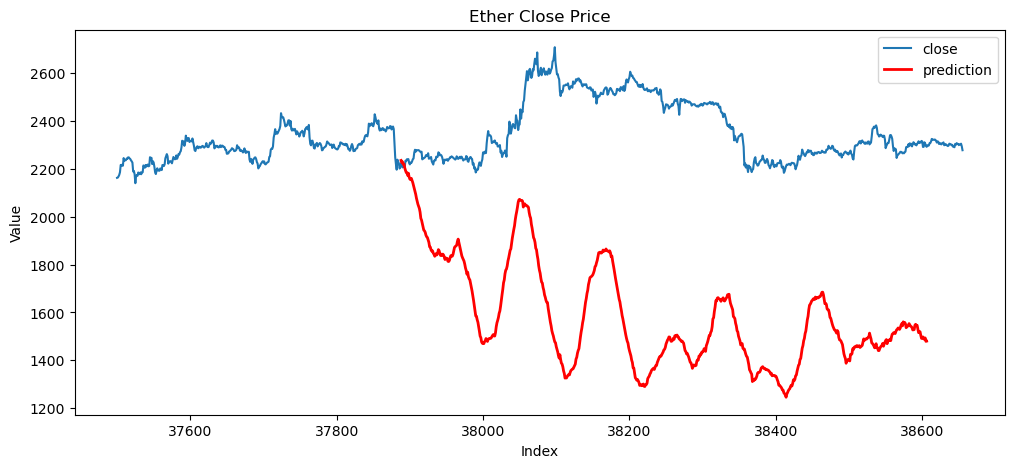

In [124]:
import matplotlib.pyplot as plt
import numpy as np

pred = np.load('0_Datasets_Aurora/prediction.npy') # load the predictions that we saved with tthe training notebook
pred_flattened = pred.flatten()
pred_flattened.shape

window_size = 50 # configure window size here
kernel = np.ones(window_size) / window_size  # Create a smoothing kernel
pred_flattened = np.convolve(pred_flattened, kernel, mode='valid')  # Perform convolution

# configure the cutoff point here
cutoff = 37500
shift = len(df['close'][cutoff:]) - 768 # 24 samples * 32 timesteps each = 768 points on the scale 

prediction = pred_flattened
blank_overlay = [np.nan] * (cutoff+shift) + list(prediction)  # Blank (NaN) at the start

# Plot the 'Value' column
plt.figure(figsize=(12, 5))  # Set the figure size
plt.plot(df['close'][cutoff:], label='close')  # Line plot
plt.plot(blank_overlay, label='prediction', color='red', linestyle='-', linewidth=2)

plt.title("Ether Close Price")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()


In [75]:
pred.shape

(24, 32, 1)